In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

c:\Users\Nathan\miniconda3\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Nathan\miniconda3\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Nathan\miniconda3\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Nathan\miniconda3\envs\species-id\lib\site-

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [3]:
path = "./TEST/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [4]:
# Example parameters for BirdNET
#isolation_parameters = {
#    "model" : "birdnet",
#    "output_path" : "outputs",
#    "lat" : 35.4244,
#    "lon" : -120.7463,
#    "week" : 18,
#    "min_conf" : 0.1,
#    "filetype" : "wav", 
#    "num_predictions" : 1,
#    "write_to_csv" : False
#}

# Example Parameters for Microfaune
isolation_parameters = {
     "model" :          "microfaune",
     "technique" :       "steinberg",
     "threshold_type" :  "median",
     "threshold_const" : 2.0,
     "threshold_min" :   0.0,
     "window_size" :     2.0,
     "chunk_size" :      5.0,
     "verbose"     :     True
}

# Example parameters for TweetyNET
#isolation_parameters = {
#     "model" : "tweetynet",
#     "tweety_output": True,
#    "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
#}

### Pandas Ouput of Automated Labeling 

In [5]:
automated_df = generate_automated_labels(path,isolation_parameters);

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Function that gathers statistics about the duration of annotations

In [6]:
annotation_duration_statistics(automated_df)

COUNT   MODE       MEAN  STANDARD DEVIATION       MIN       Q1    MEDIAN  \
0     47  10.86  11.201499           11.262309  1.092789  3.97051  8.448844   

          Q3        MAX  
0  12.345986  55.420816

### Function that converts annotations into 3 second chunks

In [7]:
annotation_chunker(automated_df, 3)

IN FILE  CLIP LENGTH  CHANNEL  OFFSET  DURATION  SAMPLE RATE  \
0    ScreamingPiha1.wav    32.615986        0     0.0       3.0        44100   
1    ScreamingPiha1.wav    32.615986        0     3.0       3.0        44100   
2    ScreamingPiha1.wav    32.615986        0     6.0       3.0        44100   
3    ScreamingPiha1.wav    32.615986        0     9.0       3.0        44100   
4    ScreamingPiha1.wav    32.615986        0    12.0       3.0        44100   
..                  ...          ...      ...     ...       ...          ...   
181  ScreamingPiha9.wav    37.302857        0    21.0       3.0        44100   
182  ScreamingPiha9.wav    37.302857        0    24.0       3.0        44100   
183  ScreamingPiha9.wav    37.302857        0    27.0       3.0        44100   
184  ScreamingPiha9.wav    37.302857        0    30.0       3.0        44100   
185  ScreamingPiha9.wav    37.302857        0    33.0       3.0        44100   

    MANUAL ID  
0        bird  
1        bird  
2        bird  
3        bird  
4        bird  
..        ...  
181      bird  
182      bird  
183      bird  
184      bird  
185      bird  

[186 rows x 7 columns]

### Human Manual Labels for Comparison 

In [8]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

FOLDER             IN FILE  CLIP LENGTH  CHANNEL   OFFSET  DURATION  \
0    ./TEST/  ScreamingPiha1.wav      32.6160        0   1.5448    2.1297   
1    ./TEST/  ScreamingPiha1.wav      32.6160        0  10.1638    0.8498   
2    ./TEST/  ScreamingPiha1.wav      32.6160        0   0.5549    0.9999   
3    ./TEST/  ScreamingPiha1.wav      32.6160        0   8.7739    0.8399   
4    ./TEST/  ScreamingPiha1.wav      32.6160        0  12.6335    1.9997   
..       ...                 ...          ...      ...      ...       ...   
249  ./TEST/  ScreamingPiha2.wav      33.9331        0  26.9274    1.7602   
250  ./TEST/  ScreamingPiha2.wav      33.9331        0  30.8178    0.7200   
251  ./TEST/  ScreamingPiha2.wav      33.9331        0  29.8677    0.9401   
252  ./TEST/  ScreamingPiha2.wav      33.9331        0  31.5378    1.9502   
253  ./TEST/  ScreamingPiha2.wav      33.9331        0  33.7880    0.1100   

     SAMPLE RATE MANUAL ID  
0          16000      bird  
1          16000      bird  
2          16000      bird  
3          16000      bird  
4          16000      bird  
..           ...       ...  
249        44100      bird  
250        44100      bird  
251        44100      bird  
252        44100      bird  
253        44100      bird  

[254 rows x 8 columns]

In [9]:
annotation_duration_statistics(manual_df)

COUNT  MODE      MEAN  STANDARD DEVIATION   MIN        Q1   MEDIAN  \
0    254  1.87  1.068224            0.664488  0.11  0.532475  0.78005   

         Q3     MAX  
0  1.767475  3.1199

### Histogram Visualization of Annotation Lengths

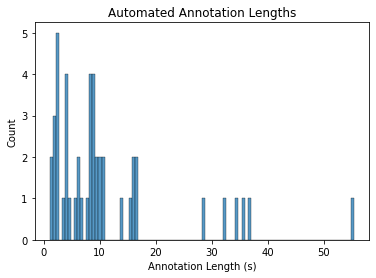

In [10]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

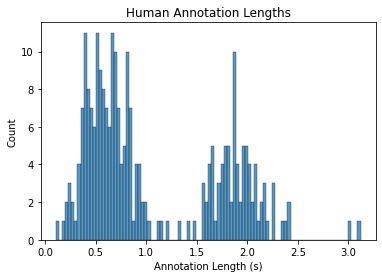

In [11]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [12]:
kaleidoscope_conversion(manual_df)

FOLDER             IN FILE  CHANNEL   OFFSET  DURATION MANUAL ID
0    ./TEST  ScreamingPiha1.wav        0   1.5448    2.1297      bird
1    ./TEST  ScreamingPiha1.wav        0  10.1638    0.8498      bird
2    ./TEST  ScreamingPiha1.wav        0   0.5549    0.9999      bird
3    ./TEST  ScreamingPiha1.wav        0   8.7739    0.8399      bird
4    ./TEST  ScreamingPiha1.wav        0  12.6335    1.9997      bird
..      ...                 ...      ...      ...       ...       ...
249  ./TEST  ScreamingPiha2.wav        0  26.9274    1.7602      bird
250  ./TEST  ScreamingPiha2.wav        0  30.8178    0.7200      bird
251  ./TEST  ScreamingPiha2.wav        0  29.8677    0.9401      bird
252  ./TEST  ScreamingPiha2.wav        0  31.5378    1.9502      bird
253  ./TEST  ScreamingPiha2.wav        0  33.7880    0.1100      bird

[254 rows x 6 columns]

## Different Combinations of Spectrogram and Local Score Visualization Graphs
Note: Not all models support local score arrays.

### Baseline Graph without any annotations

No handles with labels found to put in legend.


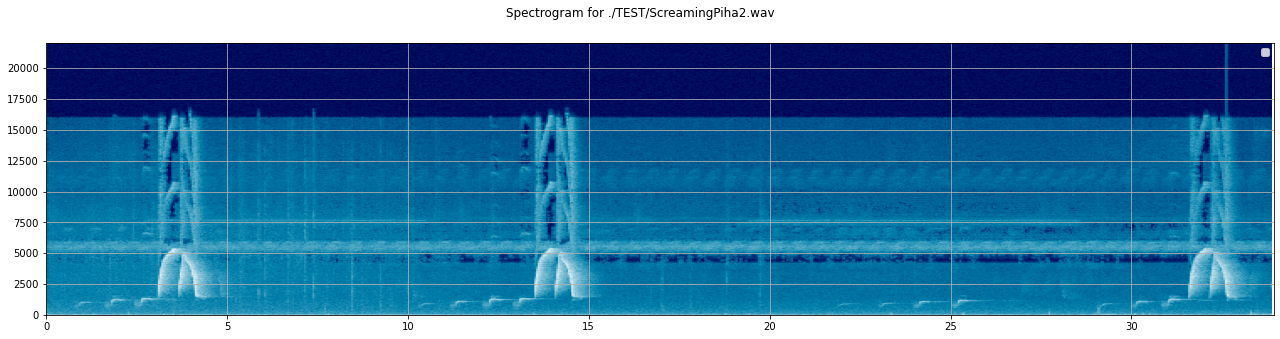

In [13]:
clip_path = "./TEST/ScreamingPiha2.wav"
spectrogram_visualization(clip_path)

### Baseline graph with log scale

No handles with labels found to put in legend.


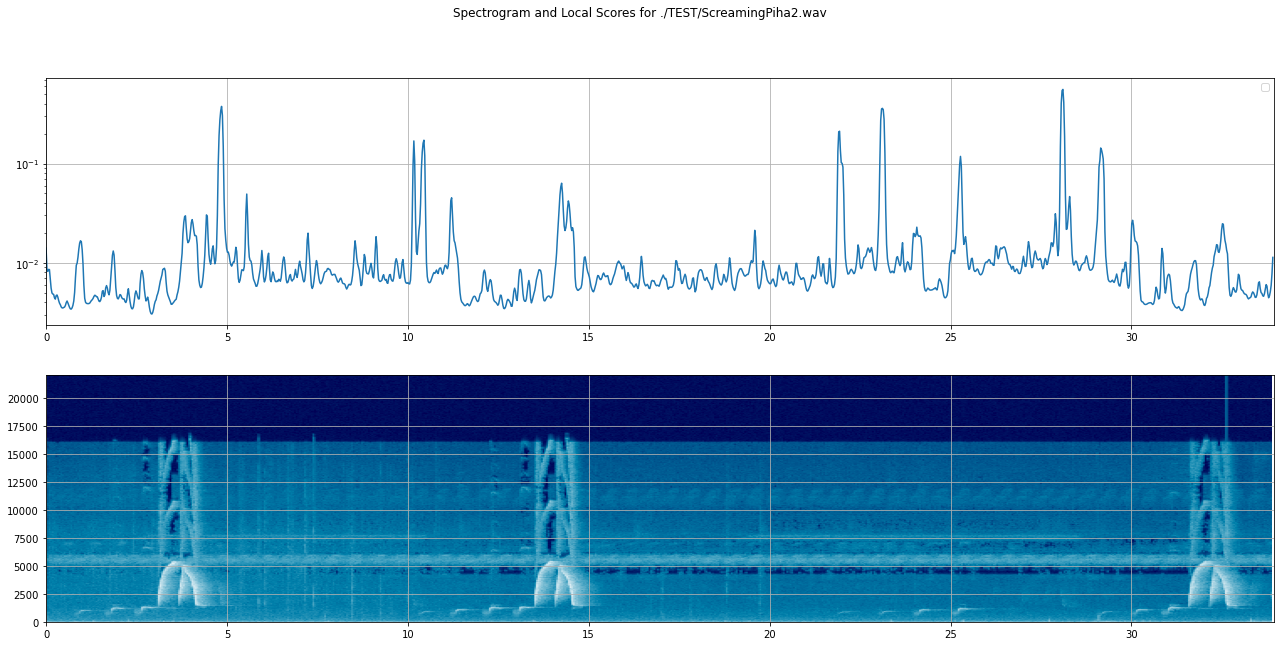

In [14]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


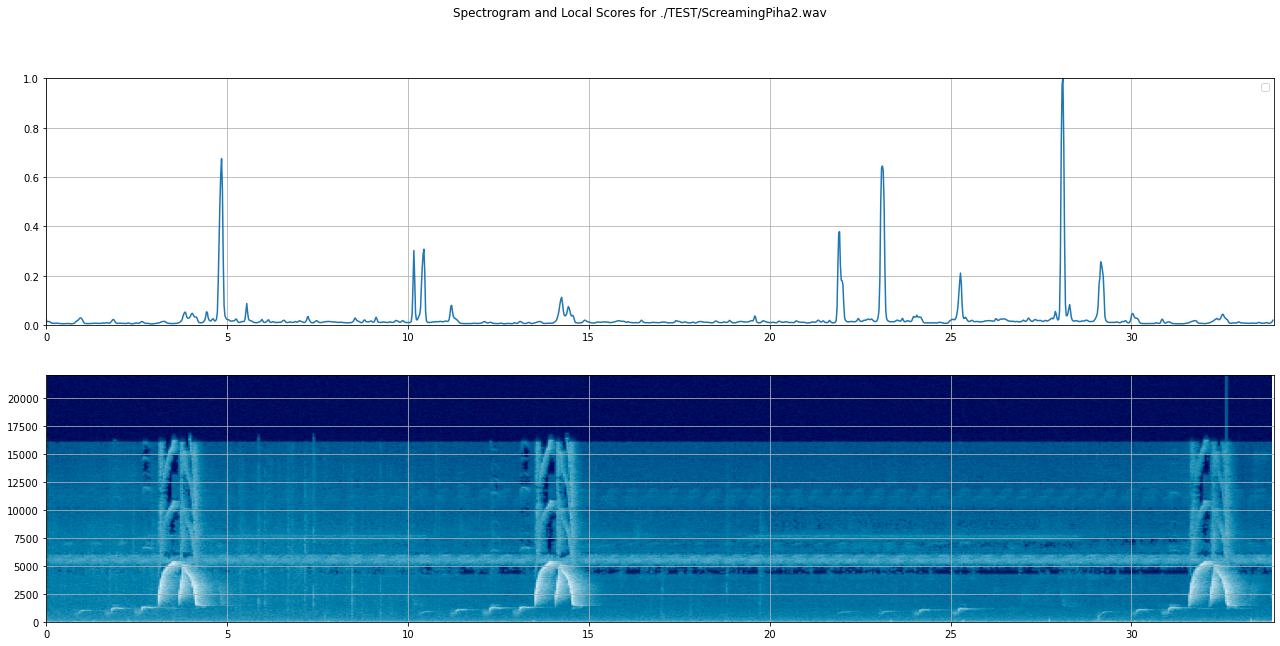

In [15]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

In [16]:
spectrogram_visualization(clip_path,build_automated_df = True, isolation_parameters = isolation_parameters)

hellosdfsdf True
Skipping ./TEST/ScreamingPiha2.wav due to error in Microfaune Prediction


NotADirectoryError: [WinError 267] The directory name is invalid: './TEST/ScreamingPiha2.wav'

### Graph with Human Labelling

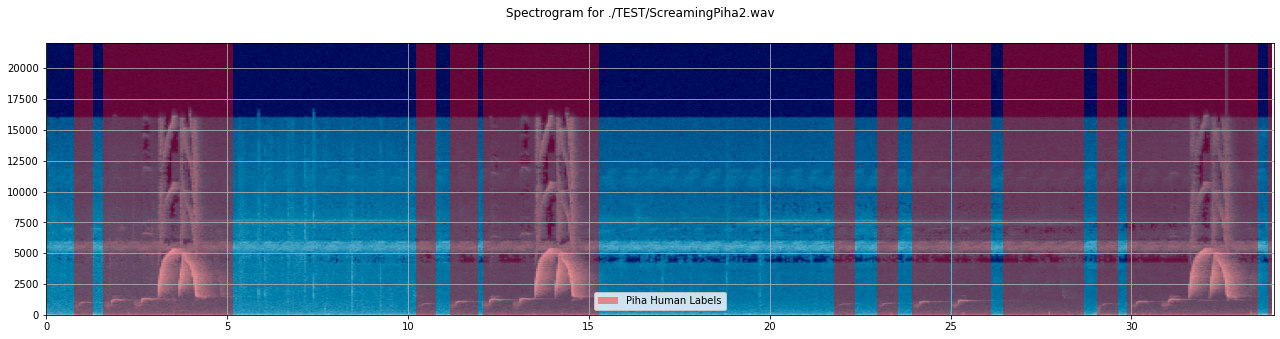

In [ ]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

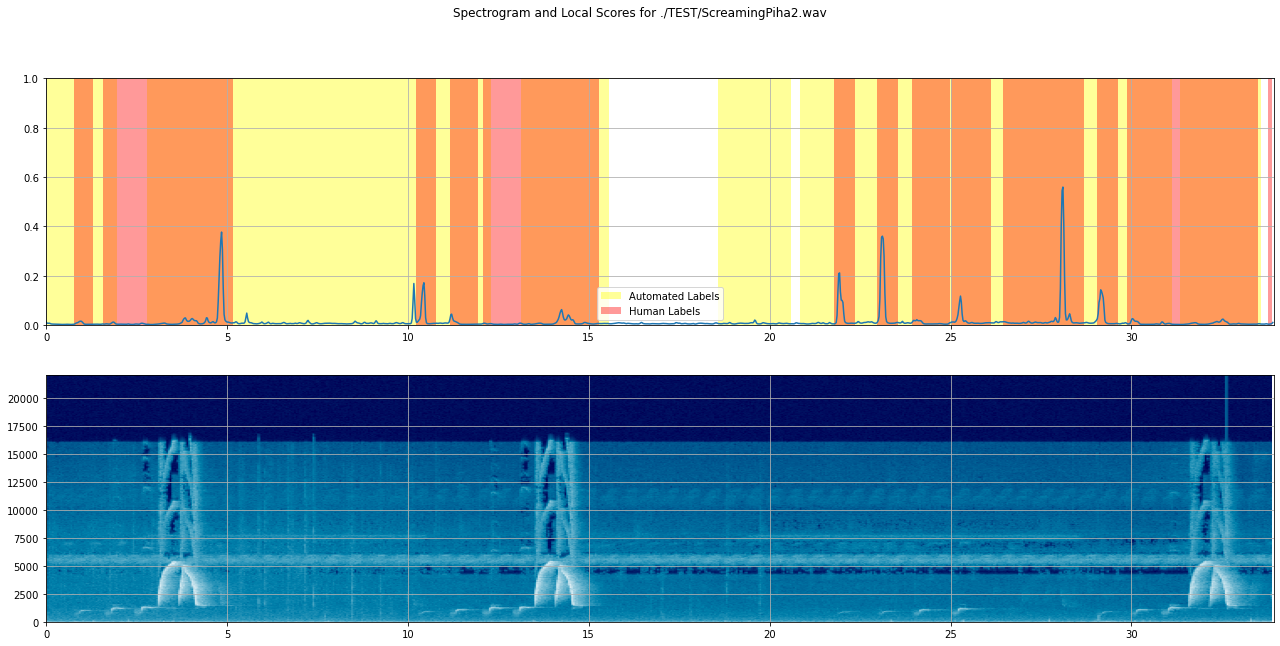

In [ ]:
spectrogram_visualization(clip_path,build_automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

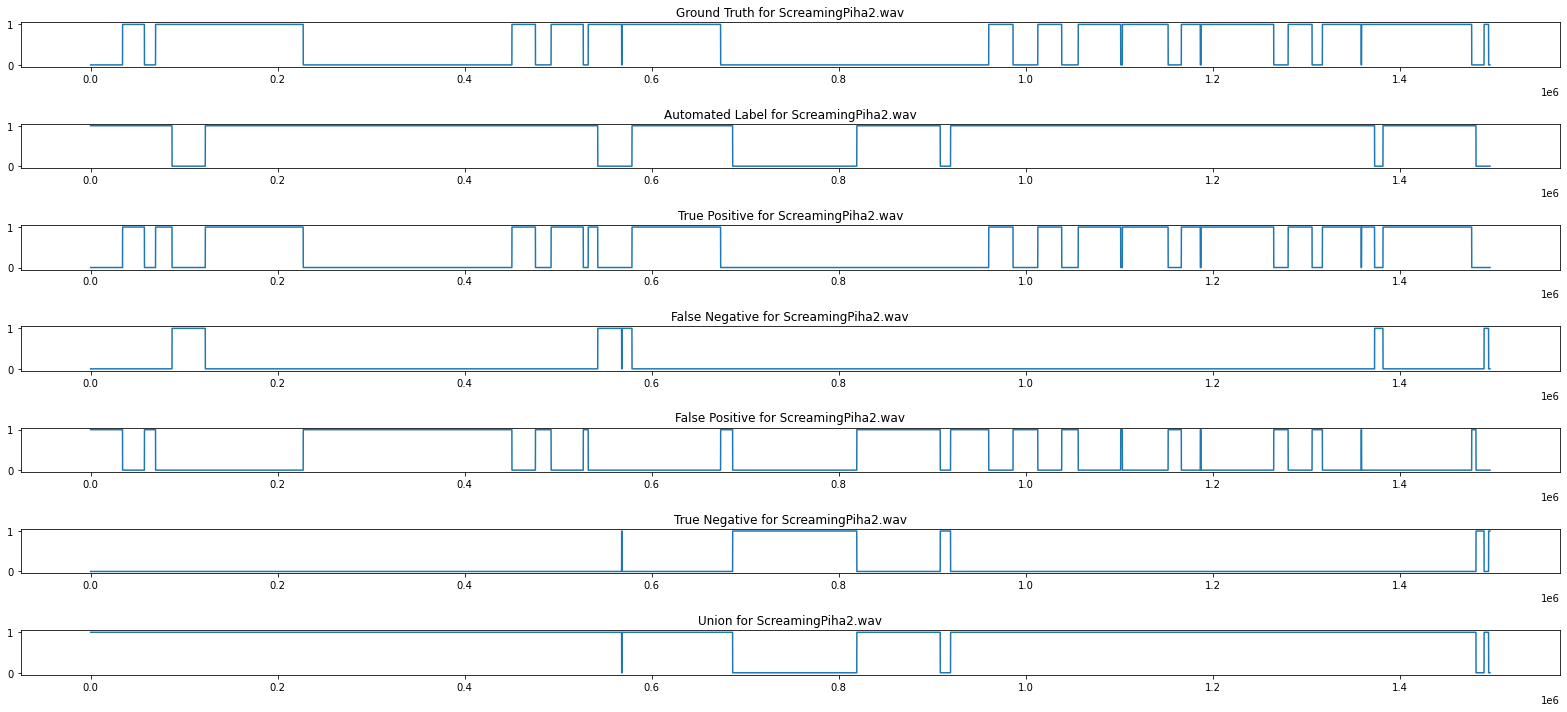

In [ ]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [ ]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

FOLDER              IN FILE MANUAL ID  TRUE POSITIVE  FALSE POSITIVE  \
0   ./TEST/   ScreamingPiha1.wav      bird      29.014308        3.394807   
1   ./TEST/  ScreamingPiha10.wav      bird      32.457098       46.491542   
2   ./TEST/  ScreamingPiha11.wav      bird      31.577596       25.105533   
3   ./TEST/   ScreamingPiha2.wav      bird      16.551043       11.939705   
4   ./TEST/   ScreamingPiha3.wav      bird       4.455692        2.388390   
5   ./TEST/   ScreamingPiha4.wav      bird       5.065125        3.801270   
6   ./TEST/   ScreamingPiha5.wav      bird      31.081066       16.264036   
7   ./TEST/   ScreamingPiha6.wav      bird      24.842993       38.688141   
8   ./TEST/   ScreamingPiha7.wav      bird      49.733333       78.801837   
9   ./TEST/   ScreamingPiha8.wav      bird       6.900091       36.233311   
10  ./TEST/   ScreamingPiha9.wav      bird      24.449433        7.234104   

    FALSE NEGATIVE  TRUE NEGATIVE       UNION  PRECISION    RECALL        F1  \
0         0.206871       0.000000   32.615986   0.895251  0.992921  0.941560   
1         6.924195       3.910023   85.872834   0.411117  0.824176  0.548586   
2         6.239773       0.972608   62.922902   0.557090  0.835002  0.668305   
3         1.940680       3.501633   30.431429   0.580927  0.895051  0.704562   
4         0.000000       0.000000    6.844082   0.651028  1.000000  0.788634   
5         0.336440       4.354717    9.202834   0.571272  0.937714  0.710000   
6         4.217574       2.615283   51.562676   0.656479  0.880517  0.752170   
7         0.015261       7.088685   63.546395   0.391037  0.999386  0.562126   
8         1.896871       3.158163  130.432041   0.386924  0.963260  0.552085   
9         0.000000       0.987415   43.133401   0.159971  1.000000  0.275819   
10        4.142993       1.476327   35.826531   0.771676  0.855102  0.811250   

    Global IoU  
0     0.889573  
1     0.377967  
2     0.501846  
3     0.543880  
4     0.651028  
5     0.550387  
6     0.602782  
7     0.390943  
8     0.381297  
9     0.159971  
10    0.682439

### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [ ]:
global_dataset_statistics(statistics_df)

MANUAL ID  PRECISION    RECALL        F1  Global IoU
0      bird     0.4865  0.908099  0.633573    0.463671

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.0298 0.     0.     0.     0.    ]
 [0.     0.2207 0.     0.     0.     0.    ]
 [0.2685 0.     0.     0.     0.     0.    ]
 [0.     0.0599 0.     0.     0.     0.    ]
 [0.1646 0.     0.     0.     0.     0.    ]
 [0.     0.082  0.     0.     0.     0.    ]
 [0.     0.0229 0.     0.     0.     0.    ]
 [0.     0.     0.1339 0.     0.     0.    ]
 [0.     0.     0.     0.     0.0574 0.    ]
 [0.     0.     0.7376 0.     0.     0.    ]
 [0.     0.     0.     0.     0.1002 0.    ]
 [0.     0.     0.     0.     0.0564 0.    ]
 [0.     0.     0.     0.     0.108  0.    ]
 [0.     0.     0.     0.     0.0447 0.    ]
 [0.     0.     0.     0.     0.0564 0.    ]
 [0.     0.     0.     0.     0.1712 0.    ]
 [0.     0.     0.     0.     0.0295 0.0724]
 [0.     0.     0.     0.     0.0914 0.    ]
 [0.     0.     0.     0.     0.     0.8648]
 [0.     0.     0.     0.     0.     0.    ]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

FOLDER             IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0  ./TEST/  ScreamingPiha2.wav      bird              2              18   

   FALSE POSITIVE  PRECISION  RECALL      F1  
0               4     0.3333     0.1  0.1538

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

FOLDER              IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0   ./TEST/   ScreamingPiha1.wav      bird              0              88   
1   ./TEST/  ScreamingPiha10.wav      bird              2              38   
2   ./TEST/  ScreamingPiha11.wav      bird              0              35   
3   ./TEST/   ScreamingPiha2.wav      bird              2              18   
4   ./TEST/   ScreamingPiha3.wav      bird              0               6   
5   ./TEST/   ScreamingPiha4.wav      bird              0               8   
6   ./TEST/   ScreamingPiha5.wav      bird              1              29   
7   ./TEST/   ScreamingPiha6.wav      bird              0              19   
8   ./TEST/   ScreamingPiha7.wav      bird              0              51   
9   ./TEST/   ScreamingPiha8.wav      bird              0               9   
10  ./TEST/   ScreamingPiha9.wav      bird              1              22   

    FALSE POSITIVE  PRECISION  RECALL      F1  
0                1     0.0000  0.0000  0.0000  
1                8     0.2000  0.0500  0.0800  
2                6     0.0000  0.0000  0.0000  
3                4     0.3333  0.1000  0.1538  
4                1     0.0000  0.0000  0.0000  
5                1     0.0000  0.0000  0.0000  
6                4     0.2000  0.0333  0.0571  
7                4     0.0000  0.0000  0.0000  
8                6     0.0000  0.0000  0.0000  
9                3     0.0000  0.0000  0.0000  
10               3     0.2500  0.0435  0.0741

### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_statistics(stats_df)
global_stats_df

MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  FALSE POSITIVE  PRECISION  RECALL  \
0       N/A              6             323              41     0.1277  0.0182   

       F1  
0  0.0319